# *Ejercicio 2*
 
 i) Ajuste una Máquina de Soporte de Vectorial a los datos del ejercicio anterior.
 
ii) Aplique OneHotEncoder a las variables categóricas.

iii) Ajuste un kernel lineal

iv) Compare su resultado de ese mismo subconjunto contra un modelo de regresión logística.

v) De los modelos anteriores obtenga la matriz de confusión y la curva ROC.

vi) Haga una optimización de hiperpametros priorizando la precisión.

vii) Haga una gráfica de Precision-Recall vs Threshold

In [162]:
import numpy             as np
from sklearn             import svm
from sklearn.datasets    import make_blobs
import matplotlib.pyplot as plt
from pandas             import read_csv
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import pandas            as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from  sklearn   import    preprocessing
from sklearn import svm
from   sklearn.pipeline        import Pipeline
from   sklearn.impute          import SimpleImputer

Procedamos a leer los datos de COVID. Note que las dimensiones del dataset son 347,502 observaciones y 11 covariables.

In [163]:
data=read_csv("covid.csv",header=0)

data

,Unnamed: 0,SEXO,OBESIDAD,DIABETES,EPOC,ASMA,CARDIOVASCULAR,RENAL CRONICA,INMUNOSUPRESION,HIPERTENSION,TIPO PACIENTE,EDAD
0,0,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,51
1,1,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,37
2,2,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,18
3,3,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,40
4,4,MUJER,NO,SI,NO,NO,NO,SI,NO,SI,HOSPITALIZADO,78
...,...,...,...,...,...,...,...,...,...,...,...,...
347497,827945,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,9
347498,827946,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,AMBULATORIO,35
347499,827948,HOMBRE,SI,NO,NO,NO,NO,NO,NO,SI,AMBULATORIO,57
347500,827949,MUJER,NO,NO,NO,NO,NO,NO,NO,SI,AMBULATORIO,71


In [164]:
# Solo para probar código
data=data.loc[:1000]


### Máquina de Soporte Vectorial

La variable de respuesta será el Tipo de Paciente, i.e. si el paciente es Hospitalizado o Ambulatorio. Al seleccionar esta variable, las primeras fila del data set de covariables resultantes es:

In [165]:
# Encoding
y=LabelEncoder().fit_transform(data['TIPO PACIENTE'])

X=data.drop(['Unnamed: 0','TIPO PACIENTE'], axis=1)
X.head(5)


,SEXO,OBESIDAD,DIABETES,EPOC,ASMA,CARDIOVASCULAR,RENAL CRONICA,INMUNOSUPRESION,HIPERTENSION,EDAD
0,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,51
1,MUJER,NO,NO,NO,NO,NO,NO,NO,NO,37
2,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,18
3,HOMBRE,NO,NO,NO,NO,NO,NO,NO,NO,40
4,MUJER,NO,SI,NO,NO,NO,SI,NO,SI,78


In [166]:
y[0:5]

array([0, 0, 0, 0, 1])

Sinteticemos un Pipeline para la generación de dos modelos con kernel lineal; el primero será mediante la función *SVC*, con un valor de regularización $C=10$, y el segundo a través de la función *LinearSVC* que cumple con otorgar mayor flexibilidad para el establecimiento de parámetros como son el número máximo de iteraciones. En este segundo modelo, se utilizará $C=100$.

In [167]:
#### Modelo 1

#X_train y_train
# numeric feaures= nombres de las columnas con datos numericos
#Crea un pipeline para generar el modelo:

#Steps es una lista de tuplas

def modelo(X_train, y_train,numeric_features,categorical_features):
    numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')), # Imputer hace que los Missing's lo sustituye por la media
     ('scaler', MinMaxScaler())   #Con minMax los mandamos al [0,1] para que las diff en los valores 
    ])
    categorical_transformer = Pipeline(steps=[
        #imputacion por el valor más frecuente
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    #onehot encoder para las varibales categoricas    
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    preprocessor = ColumnTransformer(   #Aplica las tranformaciones anterioes y junta en un solo array
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    #Ahora, a a este pipeline le aplicamos el modelo de Regresion
    #clf es un que contiene cada uno de los pasos anteriores, entonces es un clasificador, por lo que podemos
    #aplicar el modelo
    #el pipeline con el procesamiento y el clasificador
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',svm.SVC(kernel='linear', C=10, random_state=5)) ])
    modelo=clf.fit(X_train, y_train)
    return modelo


## Modelo 2 
def modeloLVSC(X_train, y_train,numeric_features,categorical_features):
    numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')), # Imputer hace que los Missing's lo sustituye por la media
     ('scaler', MinMaxScaler())   #Con minMax los mandamos al [0,1] para que las diff en los valores 
    ])
    categorical_transformer = Pipeline(steps=[
        #imputacion por el valor más frecuente
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    #onehot encoder para las varibales categoricas    
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    preprocessor = ColumnTransformer(   #Aplica las tranformaciones anterioes y junta en un solo array
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    
    #Ahora, a a este pipeline le aplicamos el modelo de Regresion
    #clf es un que contiene cada uno de los pasos anteriores, entonces es un clasificador, por lo que podemos
    #aplicar el modelo
    #el pipeline con el procesamiento y el clasificador
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier',svm.LinearSVC(C=100,max_iter=150000,random_state=5)) ])
    modelo=clf.fit(X_train, y_train)
    return modelo

Al ajustar el primero modelo al set de entrenamiento, que representa el 70% de la muestra, tenemos un score sobre el set de test de 72%:

In [168]:
# Con modelo I
#Training y Test 70% y 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=5) 
categorical_features = ['SEXO', 'OBESIDAD', 'DIABETES', 'EPOC', 'ASMA', 'CARDIOVASCULAR',
       'RENAL CRONICA', 'INMUNOSUPRESION', 'HIPERTENSION'] #Covariables
numeric_features=['EDAD']
modeloI=modelo(X_train, y_train,numeric_features,categorical_features) 
print("model score: %.3f" % modeloI.score(X_test, y_test))
y_pred=modeloI.predict(X_test)

model score: 0.721


Confeccionemos la matriz de confusión de este modelo

In [169]:
predict=modeloI.predict(X_test)
cm = metrics.confusion_matrix(y_test, predict)
print(cm) 

[[184  25]
 [ 59  33]]


Normalizándola tenemos

array([[0.75720165, 0.43103448],
       [0.24279835, 0.56896552]])

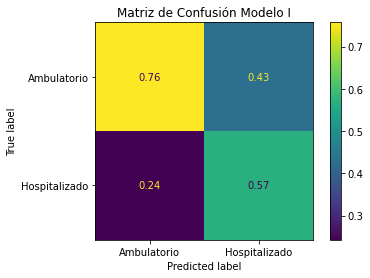

In [170]:
disp=metrics.plot_confusion_matrix(modeloI, X_test, y_test,normalize="pred",display_labels=np.array(["Ambulatorio","Hospitalizado"]))
disp.ax_.set_title("Matriz de Confusión Modelo I")
disp.confusion_matrix

Por otro lado, con el segundo modelo se logró obtener un score un poco más alto sobre el set de prueba, a saber, 74%:

In [171]:
# Con modelo II


modeloII=modeloLVSC(X_train, y_train,numeric_features,categorical_features) 
print("model score: %.3f" % modeloII.score(X_test, y_test))
y_pred=modeloII.predict(X_test)

model score: 0.748


In [172]:
predict=modeloII.predict(X_test)
cm = metrics.confusion_matrix(y_test, predict)
print(cm) 

[[189  20]
 [ 56  36]]


array([[0.77142857, 0.35714286],
       [0.22857143, 0.64285714]])

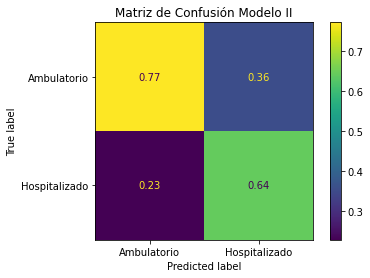

In [173]:
disp=metrics.plot_confusion_matrix(modeloII, X_test, y_test,normalize="pred",display_labels=np.array(["Ambulatorio","Hospitalizado"]))
disp.ax_.set_title("Matriz de Confusión Modelo II")
disp.confusion_matrix

### Modelo de regresión logística

Efectuemos ahora un modelo de regresión logística para comparar los resultados anteriores.

In [174]:
from   sklearn.preprocessing   import KBinsDiscretizer
from   sklearn.linear_model    import LogisticRegression
from   sklearn.model_selection import GridSearchCV


def modelo_log(X_train, y_train,numeric_features,categorical_features):
    numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')), # Imputer hace que los Missing's lo sustituye por la media
     ('scaler', MinMaxScaler())   #Con minMax los mandamos al [0,1] para que las diff en los valores 
    ])
    categorical_transformer = Pipeline(steps=[
        #imputacion por el valor más frecuente
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    #onehot encoder para las varibales categoricas    
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    preprocessor = ColumnTransformer(   #Aplica las tranformaciones anterioes y junta en un solo array
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
   
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(C=1,fit_intercept=True,solver='lbfgs',tol=1e-4,max_iter=80,random_state=10))])
    modelo=clf.fit(X_train, y_train)
    return modelo

modelo_logistic=modelo_log(X_train, y_train,numeric_features,categorical_features) 
print("model score: %.3f" % modelo_logistic.score(X_test, y_test))
y_pred=modelo_logistic.predict(X_test)


model score: 0.754


In [175]:
predict=modelo_logistic.predict(X_test)
cm = metrics.confusion_matrix(y_test, predict)
print(cm) 

[[192  17]
 [ 57  35]]


array([[0.77108434, 0.32692308],
       [0.22891566, 0.67307692]])

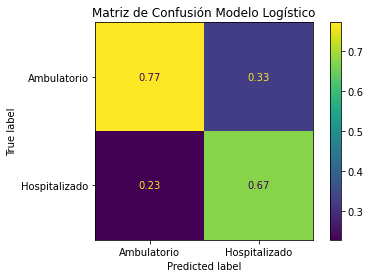

In [176]:
disp=metrics.plot_confusion_matrix(modelo_logistic, X_test, y_test,normalize="pred",display_labels=np.array(["Ambulatorio","Hospitalizado"]))
disp.ax_.set_title("Matriz de Confusión Modelo Logístico")
disp.confusion_matrix

In [177]:
# Probabilidades 
probs = modelo_logistic.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_aucI = metrics.auc(fpr, tpr)

In [178]:
roc_aucI

0.7964426877470356

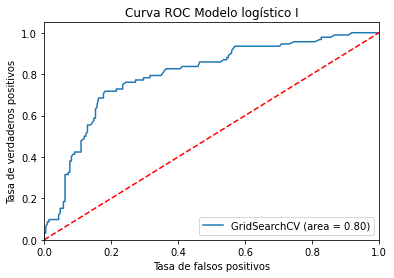

In [179]:
plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC Modelo logístico I')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Veamos algunas métricas para este primer modelo de regresión logística

In [180]:
from   sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score

predictions=modelo_logistic.predict(X_test)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.7541528239202658
Precision score:  0.6730769230769231
Recall score:  0.3804347826086957
F1 score:  0.48611111111111116


In [181]:


# Pipeline del modelo
def modelo_log_op(X_train, y_train,numeric_features,categorical_features):
    numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')), # Imputer hace que los Missing's lo sustituye por la media
     ('scaler', MinMaxScaler())   #Con minMax los mandamos al [0,1] para que las diff en los valores 
    ])
    categorical_transformer = Pipeline(steps=[
        #imputacion por el valor más frecuente
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    #onehot encoder para las varibales categoricas    
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
    #el pipeline con el procesamienot y el claificador
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', gridsearh())])
    modelo=clf.fit(X_train, y_train)
    return modelo

# GridSearch del modelo con prioización del accuracy
def gridsearh():
    clf = LogisticRegression(fit_intercept=True,solver='newton-cg',tol=1e-5,max_iter=1000)
    grid_values = {'penalty': [ 'l2'],'C':np.logspace(-5,1 , 120)}
    """se evalúan todas las combinaciones posibles de valores de parámetros y 
    se conserva la mejor combinacion."""   
    grid_clf_acc = GridSearchCV(clf, param_grid = grid_values,scoring = 'accuracy')
    return grid_clf_acc

Ajustemos el modelo después de la optimización de hiperparámetros y observemos el valor de score que arroja.

In [182]:
modelo_log_op=modelo_log_op(X_train, y_train,numeric_features,categorical_features)
print("model score: %.3f" % modelo_log_op.score(X_test, y_test))

model score: 0.761


De esta manera, el modelo queda especificado por:

In [183]:
print(modelo_log_op.named_steps['classifier'].best_estimator_)

LogisticRegression(C=1.560548645007075, max_iter=1000, solver='newton-cg',
                   tol=1e-05)


Efectuemos predicciones con el set de prueba

In [184]:
predict=modelo_log_op.predict(X_test)
cm = metrics.confusion_matrix(y_test, predict)
print(cm) 

[[193  16]
 [ 56  36]]


array([[0.7751004 , 0.30769231],
       [0.2248996 , 0.69230769]])

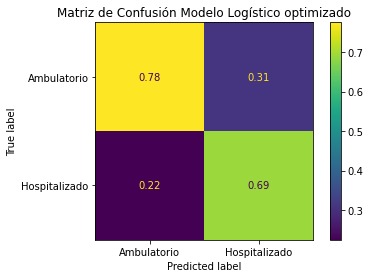

In [185]:
disp=metrics.plot_confusion_matrix(modelo_log_op, X_test, y_test,normalize="pred",display_labels=np.array(["Ambulatorio","Hospitalizado"]))
disp.ax_.set_title("Matriz de Confusión Modelo Logístico optimizado")
disp.confusion_matrix

Notemos que es necesario maximizar la cantidad de Verdaderos positivos (TP), lo que se traduce en maximizar la métrica $Recall=\frac{TP}{TP+FN}$


Grafiquemos su curva ROC 

In [186]:
# Probabilidades 
probs = modelo_log_op.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

In [187]:
roc_auc

0.7974308300395256

In [188]:
predictions=modelo_log_op.predict(X_test)
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.760797342192691
Precision score:  0.6923076923076923
Recall score:  0.391304347826087
F1 score:  0.5


Por lo tanto, con el modelo de regresión logística con optimización de hiperparámetros, se obtiene un accuracy ligeramente más alto que con las máquinas de soporte vectorial ajustadas. 

Grafiquemos la curva ROC y observemos que el AUC es del 80%.

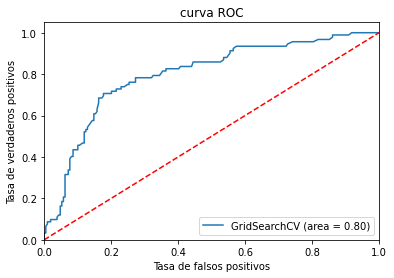

In [189]:
plt.figure()
plt.plot(fpr, tpr, label='GridSearchCV (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('curva ROC')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Procedamos a realizar una gráfica Precision-Recall vs Threshold y verifiquemos cual es el valor de este que se debe optimizar.

(0.0, 1.0)

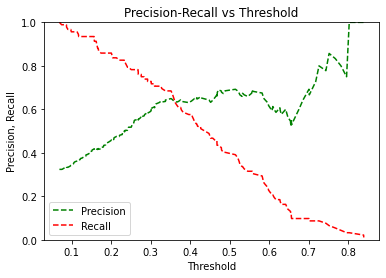

In [190]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs[:,1]) 
pr_auc = metrics.auc(recall, precision)
plt.title("Precision-Recall vs Threshold")
plt.plot(thresholds, precision[: -1], "g--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

Recordemos algunas métricas para los métodos de clasificación 

1. Accuracy o exactitud: es el número de predicciones correctas contra el número total de predicciones, 
$$
  Accuracy= \dfrac{TP+TN}{TP+FP+TN+FN}
$$
2. Precisión: Es el ratio entre positivos "verdaderos" y todos los positivos(que se clasificaron como tal aunque realmente no lo son),
$$
  Precision= \dfrac{TP}{TP+FP}
$$

3. Recall(sensibilidad) Es el ratio de positivos "verdaderos" (aquellos clasificadas como positivos, que son realmente lo son) entre todos los positivos (TP y FN)
$$
  Recall= \dfrac{TP}{TP+FN}
$$

Dado que es prioritario clasificar la mayor parte de hospitalizados correctamente sobre la clasificación incorrecta de ambulatorios como hospitalizados (falsas alarmas), se deberá aumentar la métrica $Recall= \dfrac{TP}{TP+FN}$. Por lo tanto, un threshold entre 0.1 y 0.2 otorgaría una precisión entre 40% y 50%, y un recall de entre 90% y 80%.